### Probability Correlation

In [1]:
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt

from download_data import get_mpd

In [5]:
column_def = pd.read_csv("../data/column_def.csv")
column_def

,name,description
0,maturity_target,The time-to-expiry target for options selection
1,mu,The mean of the MPD; mu = sum(probability at ...
2,sd,The standard deviation of the MPD; sd = sqrt(...
3,skew,The skew of the MPD; skew = sum(probability a...
4,kurt,The kurtosis of the MPD; kurt = sum(probabili...
5,p10,The 10th percentile of the MPD
6,p50,The 50th percentile of the MPD
7,p90,The 90th percentile of the MPD
8,lg_change_prob,The change in the expected return in percentag...
9,prDec,"The probability of a ""large decline"" in return..."


In [6]:
data = get_mpd()
data[["market", "type"]].drop_duplicates().groupby("type").count()

,market
type,
commodity,6
equity,2
equity_idx,3
fx,3
inflation,3
rate,4


<Axes: xlabel='market', ylabel='market'>

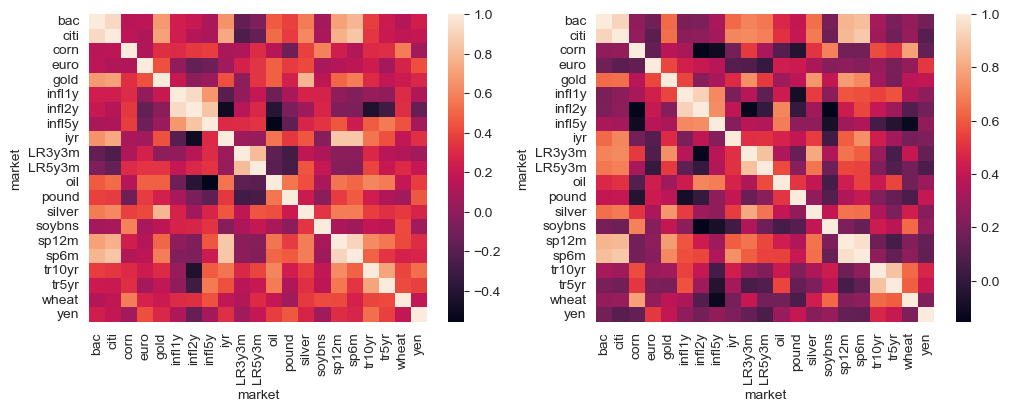

In [2]:
unique_tickers = data["market"].unique()

inc_corr = data.set_index(["idt", "market"])["prInc"].unstack().corr().reindex(unique_tickers).T.reindex(unique_tickers).T
dec_corr = data.set_index(["idt", "market"])["prDec"].unstack().corr().reindex(unique_tickers).T.reindex(unique_tickers).T


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

heatmap(inc_corr, ax=ax[0])
heatmap(dec_corr, ax=ax[1])

In [3]:
inc_corr_unstack = inc_corr.unstack().sort_values()
inc_corr_unstack = inc_corr_unstack.loc[inc_corr_unstack != 1]

pd.concat([
    inc_corr_unstack.head(),
    inc_corr_unstack.tail()
])

market  market
oil     infl5y   -0.558074
infl5y  oil      -0.558074
infl2y  iyr      -0.495354
iyr     infl2y   -0.495354
tr10yr  infl2y   -0.428932
sp6m    sp12m     0.902828
bac     citi      0.922992
citi    bac       0.922992
infl1y  infl2y    0.928834
infl2y  infl1y    0.928834
dtype: float64

In [4]:
dec_corr_unstack = dec_corr.unstack().sort_values()
dec_corr_unstack = dec_corr_unstack.loc[dec_corr_unstack != 1]

pd.concat([
    dec_corr_unstack.head(),
    dec_corr_unstack.tail()
])

market  market
infl2y  corn     -0.154837
corn    infl2y   -0.154837
infl2y  soybns   -0.150808
soybns  infl2y   -0.150808
LR3y3m  infl2y   -0.140856
infl2y  infl1y    0.921013
bac     citi      0.931003
citi    bac       0.931003
sp6m    sp12m     0.967133
sp12m   sp6m      0.967133
dtype: float64